In [1]:
from wristpy.io.readers import readers
import pathlib
import polars as pl
import numpy as np 
from matplotlib import pyplot as plt
from wristpy.core import models, computations
from wristpy.processing import calibration, metrics

In [2]:
data = readers.read_watch_data(pathlib.Path("/Users/freymon.perez/Documents/raw_gt3x_data_archive/NDARHU018AT3.gt3x"))
accel_data = data.acceleration
calibrator = calibration.Calibration(chunked=True)
calibrated_data = calibrator.run(acceleration=accel_data)

In [3]:
linear_trans = calibrator._calibrate(accel_data)

In [4]:
linear_trans["scale"]

array([0.99753563, 1.00287786, 1.00402663])

In [5]:
linear_trans["offset"]

array([ 0.00062693, -0.00136251,  0.00250709])

In [4]:
ggir_data = pl.read_csv("/Users/freymon.perez/Documents/ggir_raw_outputs_group1/NDARHU018AT3.gt3x.RData.csv")

In [5]:
enmo_1 = metrics.euclidean_norm_minus_one(accel_data)
enmo_2 = metrics.euclidean_norm_minus_one(calibrated_data)

In [6]:
epoch_data = computations.moving_mean(enmo_1)
epoch_data_cal = computations.moving_mean(enmo_2)

In [17]:
len(epoch_data.measurements)

386472

In [15]:
len(ggir_data)

386460

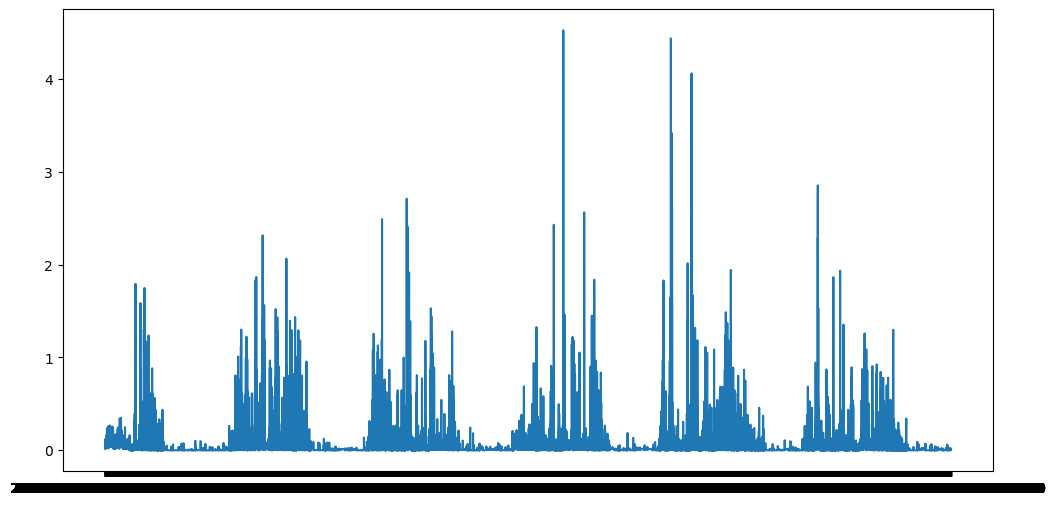

In [23]:
plt.figure(figsize = (12,6))
plt.plot(ggir_data["timestamp"][:100000], ggir_data["ENMO"][:100000])
plt.show()

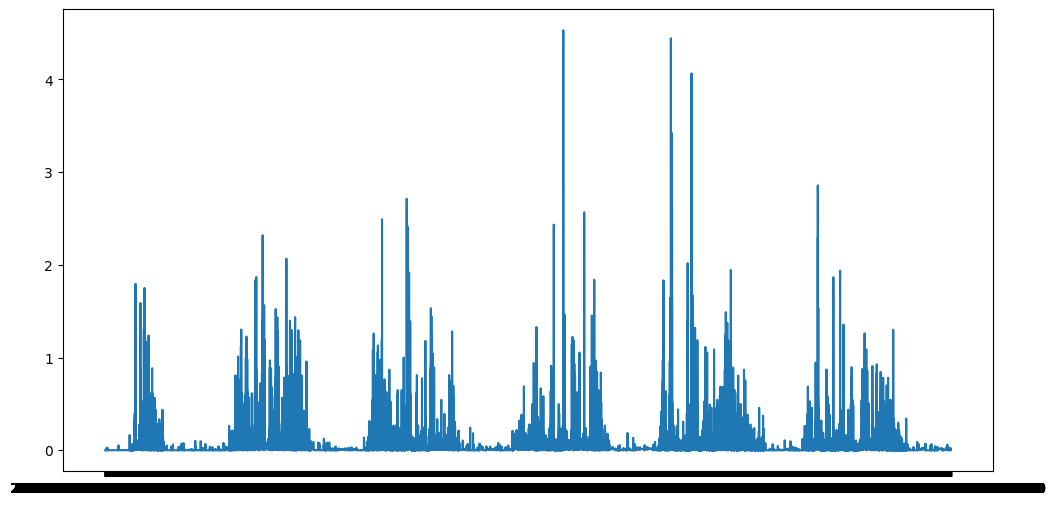

In [22]:
plt.figure(figsize = (12,6))
plt.plot(ggir_data["timestamp"][:100000], epoch_data_cal.measurements[:100000])
plt.show()

In [7]:
array = np.array(ggir_data["ENMO"][:100000])
error = array - epoch_data_cal.measurements[:100000]

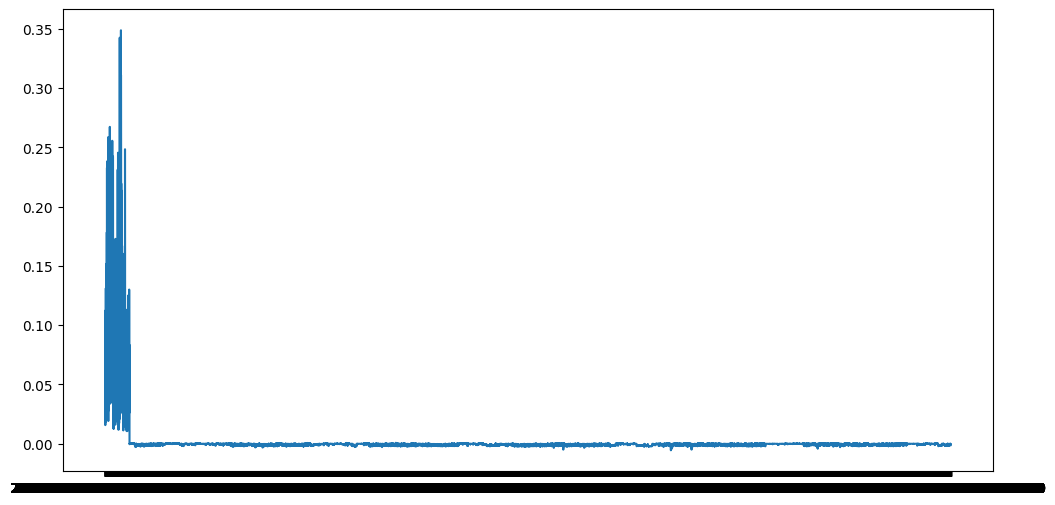

In [8]:
plt.figure(figsize = (12,6))
plt.plot(ggir_data["timestamp"][:100000], error)
plt.show()

In [15]:
len(ggir_data)

386460

In [56]:
import importlib
importlib.reload(calibration)

<module 'wristpy.processing.calibration' from '/Users/freymon.perez/Projects/GitHub/wristpy/src/wristpy/processing/calibration.py'>

In [57]:
from datetime import datetime, timedelta 

start = datetime(2024,1,1)
delta = timedelta(seconds=1 / 60)
dummy_datetime = [start + (i * delta) for i in range(60)]
dummy_data = np.zeros((60, 3))
dummy_measure = models.Measurement(
    measurements=dummy_data, time=pl.Series(dummy_datetime)
)
calibrator = calibration.Calibration()

sampling_rate = calibrator._get_sampling_rate(dummy_measure)




In [50]:
print(len(dummy_datetime))

60


In [55]:
60 / (dummy_measure.time.max() - dummy_measure.time.min()).total_seconds()

61.01572883796561

In [58]:
print(sampling_rate)

60


In [45]:
print(accel_data.time[:61])

shape: (61,)
Series: 'time' [datetime[ns]]
[
	2021-04-03 12:15:00
	2021-04-03 12:15:00.016666666
	2021-04-03 12:15:00.033333332
	2021-04-03 12:15:00.049999998
	2021-04-03 12:15:00.066666664
	…
	2021-04-03 12:15:00.933333296
	2021-04-03 12:15:00.949999962
	2021-04-03 12:15:00.966666628
	2021-04-03 12:15:00.983333294
	2021-04-03 12:15:01
]


In [6]:
calibrated_data

Measurement(measurements=array([[ 0.02400667,  0.03389491, -1.01720745],
       [ 0.02011004,  0.01430745, -1.00936349],
       [ 0.01621342,  0.00647247, -1.00544152],
       ...,
       [-0.08899542,  0.04564739, -0.99367558],
       [-0.08899542,  0.04564739, -0.99367558],
       [-0.08899542,  0.04564739, -0.9897536 ]]), time=shape: (115_941_480,)
Series: 'time' [datetime[ns]]
[
	2021-04-03 12:15:00
	2021-04-03 12:15:00.016666666
	2021-04-03 12:15:00.033333332
	2021-04-03 12:15:00.049999998
	2021-04-03 12:15:00.066666664
	…
	2021-04-25 21:00:58.916666630
	2021-04-25 21:00:58.933333296
	2021-04-25 21:00:58.949999962
	2021-04-25 21:00:58.966666628
	2021-04-25 21:00:58.983333294
])

In [125]:
accel_data.time[-1] - accel_data.time[0]

datetime.timedelta(days=22, seconds=31558, microseconds=983333)

In [60]:
def get_sampling_rate(acceleration: models.Measurement) -> int:
    """Get sampling rate in Hz."""
    
    # Make sure acceleration.time is a Polars Series of Datetime
    timestamps = pl.Series(acceleration.time)

    # Calculate total duration in nanoseconds
    total_duration = timestamps.max() - timestamps.min()  # This is a timedelta object
    total_duration_ns = total_duration.total_seconds() 

    num_samples = timestamps.len()

    # Calculate sampling rate in Hertz (Hz)
    # sampling_rate_hz = (total_duration_ns / num_samples) / 1e9

    hz = num_samples / total_duration_ns

    return round(hz)

In [62]:
def _get_sampling_rate(acceleration: models.Measurement) -> int:
        sampling_rate = acceleration.time.len() / (acceleration.time.max() - acceleration.time.min()).total_seconds()
        print(sampling_rate)
        return int(round(sampling_rate))

In [64]:
x = _get_sampling_rate(acceleration=accel_data)
type(x)

59.99996946738131


int

In [ ]:
# ERROR ABOVE IS BC DATA FOUND NO NO MOTION DATA WE MUST USE REAL DATA THAT WONT FAIL HERE AND ALSO PUT IN AN ERROR FOR WHEN THIS HAPPENS
# ADD THIS NEW ERROR TO THE ERRORS IN THE EXCEPT STATEMENT, ALSO DOUBLE CHECK THATS THE BEST WAY TO DO THAT.

In [3]:
len(accel_data.measurements)

115941480

In [4]:
len(calibrated_data.measurements)

115941480

In [6]:
accel_data.time[-1]

datetime.datetime(2021, 4, 25, 21, 0, 58, 983333)

In [7]:
accel_data.time[0]

datetime.datetime(2021, 4, 3, 12, 15)

In [8]:
print(accel_data.time[-1])
print(accel_data.time[0])

2021-04-25 21:00:58.983333
2021-04-03 12:15:00


In [5]:
calibrated_data.measurements[-1]

array([-0.09098678,  0.04309467, -0.98207482])

In [13]:
calibrated_data.measurements[-1]

array([-0.08899542,  0.04564739, -0.9897536 ])

In [14]:
accel_data.measurements[-1
                        ]

array([-0.08984375,  0.046875  , -0.98828125], dtype=float32)

In [11]:
ggir_output = pl.read_csv("/Users/freymon.perez/Documents/ggir_raw_outputs_group1/NDARHU018AT3.gt3x.RData.csv")

In [12]:
len(ggir_output)

386460

In [25]:
def calculate_sampling_rate(time_series: pl.Series) -> float:
    """
    Calculate the sampling rate from the time data.

    Args:
        time_series (pl.Series): A Polars Series of datetime.datetime objects.

    Returns:
        float: The calculated sampling rate in Hz.
    """
    # Ensure the time series is sorted
    time_series = time_series.sort()

    # Calculate the time differences in nanoseconds
    time_diffs = time_series.diff().dt.nanoseconds()

    # Calculate the average interval in seconds
    avg_interval_s = time_diffs.mean() /1e9

    # Determine the sampling rate (Hz)
    sampling_rate = 1 / avg_interval_s

    return sampling_rate

In [26]:
sample_rate = calculate_sampling_rate(accel_data.time)

/var/folders/09/drdv5jw504142vpxfq711jf815q1qc/T/ipykernel_17072/2403041156.py:15: DeprecationWarning: `nanoseconds` is deprecated. It has been renamed to `total_nanoseconds`.
  time_diffs = time_series.diff().dt.nanoseconds()


In [27]:
sample_rate

59.99996894987

In [19]:
print(accel_data.time[1])

2021-04-03 12:15:00.016666


In [11]:
import numpy as np

# 1. Random Floats (0 to 1)
random_floats = np.random.rand(10, 3)
print("Random floats between 0 and 1:\n", random_floats)

# 2. Random Integers (Specify Range)
random_integers = np.random.randint(1, 101, size=(10, 3))

Random floats between 0 and 1:
 [[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289]
 [0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378]
 [0.51423444 0.59241457 0.04645041]]


In [5]:
sub = random_integers[:4,:]

In [6]:
sub

array([[57, 52, 96],
       [91,  5, 11],
       [50, 54, 14],
       [27, 83, 63]])

In [9]:
1296000 * 6

7776000

In [25]:
def find_rate(timestamps):
  time_diffs = timestamps.diff()
  time_diff_seconds = time_diffs.dt.seconds() + time_diffs.dt.nanoseconds() * 1e-9
  avg = time_diff_seconds.mean()
  hz = 1/avg
  return hz

In [26]:
sampling_rate = find_rate(accel_data.time)

/var/folders/09/drdv5jw504142vpxfq711jf815q1qc/T/ipykernel_28230/2321317720.py:3: DeprecationWarning: `seconds` is deprecated. It has been renamed to `total_seconds`.
  time_diff_seconds = time_diffs.dt.seconds() + time_diffs.dt.nanoseconds() * 1e-9
/var/folders/09/drdv5jw504142vpxfq711jf815q1qc/T/ipykernel_28230/2321317720.py:3: DeprecationWarning: `nanoseconds` is deprecated. It has been renamed to `total_nanoseconds`.
  time_diff_seconds = time_diffs.dt.seconds() + time_diffs.dt.nanoseconds() * 1e-9


In [27]:
sampling_rate

59.99993789977092

In [75]:
def find_hz(timestamps):
    diffs = timestamps.diff()
    com_diff = diffs.mean()
    seconds = com_diff/ 1e9
    hz = 1/ seconds
    return hz

In [76]:
hz = find_hz(accel_data.time)

TypeError: unsupported operand type(s) for /: 'int' and 'datetime.timedelta'

In [77]:
hz = accel_data.time.diff().dt.total_nanoseconds().mean()

In [78]:
hz

16666675.291707242

In [79]:
hz / 1e9

0.01666667529170724

In [82]:
np.round(1/(hz/1e9), decimals = 0)

60.0

In [ ]:
ggir_output = pl.read_csv()

In [75]:
from wristpy.core import computations

In [81]:
date = datetime.now()
delta = timedelta(seconds=1)
dummy_datetime = [date + (i * delta) for i in range(60)]
dummy_data = np.random.uniform(-0.29, 0.29, (60, 3))

dummy_measure = models.Measurement(
    measurements=dummy_data, time=pl.Series(dummy_datetime).alias("time")
)
calibrator = calibration.Calibration()

no_motion = calibrator._extract_no_motion(acceleration=dummy_measure) 


In [12]:
from typing import Dict
from sklearn import linear_model

In [13]:
import numpy as np 

In [14]:
np.random.seed(42)
no_motion_data = np.full((100,3), (1/np.sqrt(3)))  # for test below

In [15]:
#testing closest point fit 


weights = np.ones(no_motion_data.shape[0]) * 100
residual = [np.Inf]

linear_regression_model = linear_model.LinearRegression()

offset = np.zeros(3)
scale = np.ones(3)
for i in range(1000):
    current = (no_motion_data * scale) + offset
    closest_point = current / np.linalg.norm(current, axis=1, keepdims=True)
    offset_change = np.zeros(3)
    scale_change = np.ones(3)

    for k in range(3):
        x_ = np.vstack((current[:, k]))
        tmp_y = np.vstack((closest_point[:, k]))
        linear_regression_model.fit(x_, tmp_y, sample_weight=weights)

        offset_change[k] = linear_regression_model.intercept_[0]
        scale_change[k] = linear_regression_model.coef_[0, 0]
        current[:, k] = (x_ @ linear_regression_model.coef_).flatten()

    scale = scale_change * scale
    offset = offset_change + (offset / scale)

    residual.append(
        3
        * np.mean(
            weights[:, None] * (current - closest_point) ** 2 / weights.sum()
        )
    )
    weights = np.minimum(
        1 / np.linalg.norm(current - closest_point, axis=1), 100
    )

    if abs(residual[i] - residual[i - 1]) < 0.1:
        break

print(scale, offset)

[1. 1. 1.] [3.33066907e-16 3.33066907e-16 3.33066907e-16]


In [16]:


# input_matrix = np.full((100000,3), (1/np.sqrt(3))) + (np.random.rand(100000, 3))
output_matrix = (no_motion_data * scale) + offset


In [150]:
np.linalg.norm(output_matrix[0])

1.0

In [151]:
np.linalg.norm(no_motion_data[0])

1.0

In [67]:
window_size_seconds = str(10) + "s"

measurement_polars_df = pl.concat(
    [pl.DataFrame(dummy_measure.measurements), pl.DataFrame(dummy_measure.time)], how="horizontal"
)

measurement_polars_df = measurement_polars_df.with_columns(
    pl.col("time").set_sorted()
)

take_std_expression = [
    pl.all().exclude(["time"]).drop_nans().std(),
]

In [69]:
count = measurement_polars_df.select(pl.col("*").is_null().sum())

In [70]:
count

column_0,column_1,column_2,time
u32,u32,u32,u32
0,0,0,40


In [72]:
len(measurement_polars_df["time"])

100

In [73]:
len(measurement_polars_df["column_0"])

100

In [4]:
### Adam's test :

In [5]:
calibrated_data

Measurement(measurements=array([[ 0.02070457,  0.03155785, -1.00924056],
       [ 0.01682692,  0.01198206, -1.00140914],
       [ 0.01294927,  0.00415174, -0.99749343],
       ...,
       [-0.09174733,  0.04330332, -0.98574631],
       [-0.09174733,  0.04330332, -0.98574631],
       [-0.09174733,  0.04330332, -0.9818306 ]]), time=shape: (115_941_480,)
Series: 'time' [datetime[ns]]
[
	2021-04-03 12:15:00
	2021-04-03 12:15:00.016666666
	2021-04-03 12:15:00.033333332
	2021-04-03 12:15:00.049999998
	2021-04-03 12:15:00.066666664
	…
	2021-04-25 21:00:58.916666630
	2021-04-25 21:00:58.933333296
	2021-04-25 21:00:58.949999962
	2021-04-25 21:00:58.966666628
	2021-04-25 21:00:58.983333294
])

In [7]:
data = readers.read_watch_data(pathlib.Path("/Users/freymon.perez/Documents/raw_gt3x_data_archive/NDARHU018AT3.gt3x"))

In [8]:
from wristpy.processing import metrics 

In [9]:
type(data)

wristpy.core.models.WatchData

In [64]:
acc_data = data.acceleration
short_epoch = 700
long_epoch = 3600
sd_criteria = 0.013
range_criteria = 0.05

In [65]:
short_window_data = metrics._group_acceleration_data_by_time(acc_data, short_epoch)

In [66]:
short_in_long = int(long_epoch/short_epoch)

In [67]:
nonwear_value_array = metrics._compute_nonwear_value_array(short_window_data, short_in_long, sd_criteria, range_criteria)

In [73]:
nonwear_value_array[0]

0.0

In [69]:
len(nonwear_value_array) 

2762

In [72]:
short_window_data["X"][-1]

""
f32
-0.089844
-0.089844
-0.089844
-0.089844
-0.082031
…
-0.09375
-0.09375
-0.089844


In [79]:
from datetime import datetime , timedelta 

In [74]:
def create_dummy_measurement(
    sampling_rate: int, duration_hours: int = 84, all_same_num: float | None = None
) -> models.Measurement:
    """Create dummy measurement."""
    n_samples = int(sampling_rate * 3600 * duration_hours)
    start_time = datetime.now()
    delta = timedelta(seconds=1 / sampling_rate)

    time_data = [start_time + i * delta for i in range(n_samples)]

    if all_same_num is not None:
        measurement_data = np.full((n_samples, 3), (all_same_num))
    else:
        measurement_data = np.random.normal(loc=1.0, scale=0.1, size=(n_samples, 3))

    dummy_measurement = models.Measurement(
        measurements=measurement_data, time=pl.Series(time_data).alias("time")
    )

    return dummy_measurement

In [75]:
from wristpy.processing import calibration

In [93]:

dummy_measure = create_dummy_measurement(
    sampling_rate=1, duration_hours=(1 / 60), all_same_num=0.31
)
dummy_measure.measurements[30:] = -dummy_measure.measurements[30:]



In [94]:
calibrator = calibration.Calibration()

no_motion_data = calibrator._extract_no_motion(dummy_measure)

In [90]:
from wristpy.core import computations

In [95]:
moving_sd = computations.moving_std(dummy_measure, 10)
moving_mean = computations.moving_mean(dummy_measure, 10)

no_motion_check = np.all(
    moving_sd.measurements < 0.013, axis=1
) & np.all(np.abs(moving_mean.measurements) < 2, axis=1)

no_motion_data = moving_mean.measurements[no_motion_check]

if no_motion_data.shape[0] == 0:
    raise ValueError(
        "Zero non-motion epochs found. Data did not meet criteria."
    )

sphere_criteria_check = np.sum(
    (no_motion_data.min(axis=0) < -0.3)
    & (no_motion_data.max(axis=0) > 0.3)
)


In [96]:
sphere_criteria_check

3

In [4]:
from datetime import datetime , timedelta 

In [3]:
def create_dummy_measurement(
    sampling_rate: int = 1,
    duration_hours: float = 1.0,
    loc: float = 1,
    scale: float = .01,
    all_same_num: float | None = None,
) -> models.Measurement:
    """Create dummy measurement."""
    n_samples = int(sampling_rate * 3600 * duration_hours)
    start_time = datetime.now()
    delta = timedelta(seconds=1 / sampling_rate)

    time_data = [start_time + i * delta for i in range(n_samples)]

    if all_same_num is not None:
        measurement_data = np.full((n_samples, 3), (all_same_num))
    else:
        measurement_data = np.random.normal(loc=loc, scale=scale, size=(n_samples, 3))

    dummy_measurement = models.Measurement(
        measurements=measurement_data, time=pl.Series(time_data).alias("time")
    )

    return dummy_measurement

In [28]:
dummy = create_dummy_measurement()
dummy.measurements[-1,:] = -1

In [29]:
dummy.measurements[-1]

array([-1., -1., -1.])

In [21]:
calibrator = calibration.Calibration(min_calibration_error=0.0001, max_iterations=5)

In [22]:
moving_sd = computations.moving_std(dummy, 10)
moving_mean = computations.moving_mean(dummy, 10)

no_motion_check = np.all(
    moving_sd.measurements < calibrator.min_standard_deviation, axis=1
) & np.all(np.abs(moving_mean.measurements) < 2, axis=1)

no_motion_data = moving_mean.measurements[no_motion_check]

if no_motion_data.shape[0] == 0:
   print("theres no no motion data")

sphere_criteria_check = np.all(
    (no_motion_data.min(axis=0) < -calibrator.min_acceleration)
    & (no_motion_data.max(axis=0) > calibrator.min_acceleration)
)
if sphere_criteria_check:
    print("it works")
else:
    print("Still did not meet sphere criteria")

Still did not meet sphere criteria


In [23]:
sphere_criteria_check

False

In [26]:
print(no_motion_data[:,0].max(),no_motion_data[:,1].max(),no_motion_data[:,2].max())

1.0094747833149762 1.0087902660667551 1.0090760275630675


In [27]:
print(no_motion_data[:,0].min(),no_motion_data[:,1].min(),no_motion_data[:,2].min())

0.9915038393234663 0.9918599757047962 0.9923267723927456


In [33]:
moving_sd.measurements.max()

0.01734828512410062

In [35]:
dum = create_dummy_measurement(loc= 0, scale = 0.5)

In [36]:
cal = calibration.Calibration()

In [37]:
vals = cal._calibrate(dum)

NoMotionError: Zero non-motion epochs found. Data did not meet criteria.

In [5]:
no_mo = create_dummy_measurement(all_same_num= .32)
no_mo.measurements[30:] *= -1

In [6]:
moving_sd = computations.moving_std(no_mo, 10)
moving_mean = computations.moving_mean(no_mo, 10)

no_motion_check = np.all(
    moving_sd.measurements < calibrator.min_standard_deviation, axis=1
) & np.all(np.abs(moving_mean.measurements) < 2, axis=1)

no_motion_data = moving_mean.measurements[no_motion_check]

if no_motion_data.shape[0] == 0:
   print("theres no no motion data")

sphere_criteria_check = np.all(
    (no_motion_data.min(axis=0) < -calibrator.min_acceleration)
    & (no_motion_data.max(axis=0) > calibrator.min_acceleration)
)
if sphere_criteria_check:
    print("it works")
else:
    print("Still did not meet sphere criteria")

NameError: name 'calibrator' is not defined

In [45]:
no_motion_data

array([[ 0.32,  0.32,  0.32],
       [ 0.32,  0.32,  0.32],
       [ 0.32,  0.32,  0.32],
       ...,
       [-0.32, -0.32, -0.32],
       [-0.32, -0.32, -0.32],
       [-0.32, -0.32, -0.32]])

In [50]:
new_cal = calibration.Calibration()

In [51]:
data = new_cal._extract_no_motion(acceleration=no_mo)

In [52]:
data

array([[ 0.32,  0.32,  0.32],
       [ 0.32,  0.32,  0.32],
       [ 0.32,  0.32,  0.32],
       ...,
       [-0.32, -0.32, -0.32],
       [-0.32, -0.32, -0.32],
       [-0.32, -0.32, -0.32]])

In [7]:
dummy_measure1 = create_dummy_measurement(
    sampling_rate=1, duration_hours=1, all_same_num=0.32
)
dummy_measure1.measurements[30:] *= -1

calibrator = calibration.Calibration()

no_motion_data = calibrator._extract_no_motion(dummy_measure1)

assert no_motion_data.shape[0] > 0, "No non-motion epochs found"
assert np.all(no_motion_data.min(axis=0) <= -calibrator.min_acceleration)
assert np.all(no_motion_data.max(axis=0) >= calibrator.min_acceleration)

In [8]:
no_motion_data

array([[ 0.32,  0.32,  0.32],
       [ 0.32,  0.32,  0.32],
       [ 0.32,  0.32,  0.32],
       ...,
       [-0.32, -0.32, -0.32],
       [-0.32, -0.32, -0.32],
       [-0.32, -0.32, -0.32]])

In [9]:
samples = list(range(72, 72, 12))

In [10]:
samples

[]

In [11]:
sample = [72]

In [12]:
sample[-1]

72

In [13]:
sample = list(72)

TypeError: 'int' object is not iterable

In [15]:
x = [1,2,3]

In [16]:
x + 1

TypeError: can only concatenate list (not "int") to list

In [17]:
x = np.array([4,4,4])

In [24]:
y = np.all(x<3)

In [25]:
y

False

In [29]:
def create_dummy_measurement(
    sampling_rate: int,
    duration_hours: float = 84.0,
    loc: float = 1.0,
    scale: float = 0.1,
    all_same_num: float | None = None,
) -> models.Measurement:
    """Create dummy measurement."""
    n_samples = int(sampling_rate * 3600 * duration_hours)
    start_time = datetime.now()
    delta = timedelta(seconds=1 / sampling_rate)

    time_data = [start_time + i * delta for i in range(n_samples)]

    if all_same_num is not None:
        measurement_data = np.full((n_samples, 3), (all_same_num))
    else:
        measurement_data = np.random.normal(loc=loc, scale=scale, size=(n_samples, 3))

    dummy_measurement = models.Measurement(
        measurements=measurement_data, time=pl.Series(time_data).alias("time")
    )

    return dummy_measurement

In [217]:
dummy_nomo = create_dummy_measurement(sampling_rate=60, duration_hours=72, all_same_num=1/np.sqrt(3))
dummy_nomo.measurements[-dummy_nomo.measurements.shape[0] // 2:] *= -1 

In [218]:
import importlib

importlib.reload(calibration)

<module 'wristpy.processing.calibration' from '/Users/freymon.perez/Projects/GitHub/wristpy/src/wristpy/processing/calibration.py'>

In [219]:
np.linalg.norm(dummy_nomo.measurements[0]) # start is perfect

1.0

In [220]:
np.linalg.norm(dummy_nomo.measurements[-1]) # start is perfect 

1.0

In [221]:
dummy_nomo.measurements = (dummy_nomo.measurements * 1) + 1

In [222]:
np.linalg.norm(dummy_nomo.measurements[0]) # start for positive points 

2.732050807568877

In [223]:
np.linalg.norm(dummy_nomo.measurements[-1]) # start for negative points 

0.7320508075688771

In [224]:
test_cal = calibration.Calibration()

In [225]:
result = test_cal._calibrate(dummy_nomo)

SphereCriteriaError: Did not meet criteria to sufficnetly populate sphere

In [216]:
result

LinearTransformation(scale=array([1., 1., 1.]), offset=array([-0.05, -0.05, -0.05]))

In [206]:
1 / np.sqrt(3)

0.5773502691896258

In [226]:
dummy_no_motion = np.random.rand(100, 3) - 0.5

norms = np.linalg.norm(dummy_no_motion, axis=1, keepdims=True)
unit_sphere = dummy_no_motion / norms

In [227]:
unit_sphere

array([[ 0.60442288,  0.76419407, -0.22512308],
       [-0.73717488, -0.43331348, -0.51847143],
       [ 0.84229047, -0.11432702,  0.52675999],
       [ 0.288319  , -0.64921859,  0.7038376 ],
       [-0.38637996,  0.19920697, -0.90057044],
       [-0.67026128,  0.74153934,  0.02948242],
       [-0.99613597, -0.08107428,  0.03376508],
       [ 0.85619993,  0.51035471,  0.08037257],
       [ 0.31029334,  0.68261238, -0.66163312],
       [ 0.63780422,  0.37714269, -0.67154238],
       [-0.11559642, -0.73207911,  0.67134018],
       [ 0.07471185,  0.0706492 ,  0.99469937],
       [ 0.66646064,  0.33517118,  0.66595082],
       [ 0.52863729,  0.09615864, -0.84338374],
       [ 0.63279027, -0.5499006 ,  0.5451475 ],
       [ 0.91892766,  0.11644324,  0.37684603],
       [-0.80446528, -0.36536148, -0.46834454],
       [-0.6218225 , -0.49081936, -0.610273  ],
       [ 0.72274047,  0.62121102,  0.30289119],
       [-0.61574924, -0.66005067,  0.43033241],
       [ 0.30238938,  0.40966411, -0.860

In [230]:
no_motion_data = (unit_sphere * np.array([0.41, 0.61, 0.81])) + np.array([0.1, 0.2, 0.1])

In [232]:
sphere_criteria_check = np.all(
            (no_motion_data.min(axis=0) < -.3)
            & (no_motion_data.max(axis=0) > .3)
        )
if not sphere_criteria_check:
    print("FAiled")
else:
    print("good")

good


In [233]:
# BUG TEST VERS

In [234]:
BUG TEST VER 

SyntaxError: invalid syntax (3710048198.py, line 1)

In [ ]:
BUG TEST Ver 
def test_closest_point_fit(scale: float, offset: float) -> None:
    """Test closest point fit."""
    dummy_no_motion = np.random.randn(10000, 3) - 0.5

    norms = np.linalg.norm(dummy_no_motion, axis=1, keepdims=True)
    unit_sphere = dummy_no_motion / norms
    calibrator = calibration.Calibration()
    regular_bad_data = (unit_sphere * scale) + offset
    print(f"THIS IS REG BAD DATA: {regular_bad_data[:5]}")
    start_time = datetime.now()
    d = timedelta(seconds=1)
    time_data = [start_time + i * d for i in range(10000)]
    from wristpy.core import computations

    dummymeasure = models.Measurement(
        measurements=regular_bad_data, time=pl.Series(time_data).alias("time")
    )
    nomo = computations.moving_mean(dummymeasure, 10)
    print(f"This is NOMO data: {nomo.measurements[:5]}")

    linear_transform = calibrator._closest_point_fit(nomo.measurements)

    assert np.allclose(
        linear_transform.scale, 1 / scale, atol=1e-3
    ), f"Scale is {linear_transform.scale} expected {1/scale}"
    assert np.allclose(
        linear_transform.offset, -offset / scale, atol=1e-3
    ), f"Offset is {linear_transform.offset} expected {-offset/scale})"

In [256]:

np.random.seed(42)
scale = np.array([1.1, 0.9, 0.6])
offset =   np.array([0.1, 0.2, 0.1])

dummy_no_motion = np.random.randn(1000, 3) - 0.5
norms = np.linalg.norm(dummy_no_motion, axis=1, keepdims=True)
unit_sphere1 = dummy_no_motion / norms
calibrator = calibration.Calibration()


unique_values = np.random.randn(1000, 3) -0.5
norms2 = np.linalg.norm(unique_values, axis=1, keepdims=True)
unit_sphere2 = unique_values / norms2



In [257]:
print(f'good sphere {unit_sphere1[0]}')
print(f'cal sphere: {unit_sphere2[0]}')

good sphere [-0.00501551 -0.97424607  0.22543166]
cal sphere: [-0.82670513 -0.46707938 -0.31368054]


In [255]:
unique_values[0]

array([-2.40780756, -1.36038501, -0.91360553])

In [258]:
dummy_no_motion[0]

array([-0.00328585, -0.6382643 ,  0.14768854])

In [270]:
def create_repeating_array():
    # Create the base pattern
    base_pattern = np.arange(1, 11).repeat(3).reshape(-1, 3)
    
    # Repeat each row 10 times
    repeated_array = np.repeat(base_pattern, 10, axis=0)
    
    return repeated_array

repeated_data = create_repeating_array()

In [273]:
start_time = date_time = datetime(2024, 5, 4, 12, 0, 0)
delta = timedelta(seconds=1)
time_data = [start_time + i * delta for i in range(100)]

In [274]:
repeated_data_measure = models.Measurement(measurements= repeated_data, time = pl.Series(time_data).alias("time"))

In [290]:
type(repeated_data_measure.time.max())

datetime.datetime

In [275]:
mm = computations.moving_mean(repeated_data_measure, 10 )

In [276]:
mm

Measurement(measurements=array([[ 1.,  1.,  1.],
       [ 2.,  2.,  2.],
       [ 3.,  3.,  3.],
       [ 4.,  4.,  4.],
       [ 5.,  5.,  5.],
       [ 6.,  6.,  6.],
       [ 7.,  7.,  7.],
       [ 8.,  8.,  8.],
       [ 9.,  9.,  9.],
       [10., 10., 10.]]), time=shape: (10,)
Series: 'time' [datetime[μs]]
[
	2024-05-04 12:00:00
	2024-05-04 12:00:10
	2024-05-04 12:00:20
	2024-05-04 12:00:30
	2024-05-04 12:00:40
	2024-05-04 12:00:50
	2024-05-04 12:01:00
	2024-05-04 12:01:10
	2024-05-04 12:01:20
	2024-05-04 12:01:30
])

In [ ]:
def test_calibration_successful() -> None:
    """Test successful calibration."""
    scale = np.array([1.1, 1.01, 0.9])
    offset = np.array([0.1, 0.2, 0.1])
    expected_scale = 1 / scale
    expected_offset = -offset / scale
    dummy_no_motion = np.random.randn(1000, 3) - 0.5

    norms = np.linalg.norm(dummy_no_motion, axis=1, keepdims=True)
    unit_sphere = dummy_no_motion / norms
    test_data = np.repeat(unit_sphere, repeats=10, axis=0)
    start_time = datetime(2024, 5, 4, 12, 0, 0)
    delta = timedelta(seconds=1)
    time_data = [start_time + i * delta for i in range(10000)]
    dummy_measure = models.Measurement(
        measurements=(test_data * scale) + offset,
        time=pl.Series(time_data).alias("time"),
    )

    calibrator = calibration.Calibration(min_standard_deviation=9999)

    linear_transform = calibrator._calibrate(dummy_measure)

In [277]:
x = models.Measurement

wristpy.core.models.Measurement

In [287]:
x.time

AttributeError: 'datetime.timedelta' object has no attribute 'time'

In [278]:
type(mm)

wristpy.core.models.Measurement

In [ ]:
def test_zero_scale_error() -> None:
    """Test error due to scale becomeing zero values."""
    scale = np.array([0.3, 0.3, 0.3])
    offset = np.array([0.1, 0.2, 0.1])
    data = np.random.randn(1000, 3) - 0.5
    norms = np.linalg.norm(data, axis=1, keepdims=True)
    unit_sphere = data / norms
    calibrator = calibration.Calibration(min_acceleration=0)

    with pytest.raises(calibration.ZeroScaleError):
        calibrator._closest_point_fit((unit_sphere * scale) + offset)

In [ ]:
    @staticmethod
    def _get_sampling_rate(timestamps: pl.Series) -> int:
        """Get the sampling rate.

        Args:
            timestamps: polars series of datetime objects representing the time points
            of each sample in the acceleration data.

        Returns:
            sampling rate in Hz.
        """
        sampling_rate = timestamps.len() / round(
            (timestamps.max() - timestamps.min()).total_seconds()
        )
        return round(sampling_rate)

In [279]:
delta = timedelta(seconds = 1)
time_data = [start_time + i * delta for i in range(1000)]

In [280]:
times = pl.Series(time_data)

In [281]:
x = times.max() - times.min()

In [284]:
x

datetime.timedelta(seconds=999)

In [283]:
x.total_seconds()

999.0

In [285]:
2 < 1e-8


False

In [286]:
1e-8 < 2


True

In [9]:
from wristpy.core import config
from importlib import reload
reload(config)

<module 'wristpy.core.config' from '/Users/freymon.perez/Projects/GitHub/wristpy/src/wristpy/core/config.py'>

In [10]:
logger = config.get_logger()

In [12]:
logger.getEffectiveLevel()

20

In [13]:
logger.info("Hello")

2024-07-30 12:09:18,744 - wristpy - INFO - 1781425642.py:1 - <module> - Hello


In [14]:
logger.getEffectiveLevel()

20

In [15]:
logger.warning("warning message")

2024-07-30 12:09:39,799 - wristpy - WARNING - 3039617075.py:1 - <module> - warning message


In [16]:
logger.getEffectiveLevel()

20

In [17]:
import logging 

In [18]:
logging.getLogger().getEffectiveLevel()

30

In [19]:
logger.getEffectiveLevel()

20

In [1]:
from wristpy.core import config
from importlib import reload
reload(config)

<module 'wristpy.core.config' from '/Users/freymon.perez/Projects/GitHub/wristpy/src/wristpy/core/config.py'>

In [23]:
def test_get_logger(caplog) -> None:
    """Test the wristpy logger with level set to 20 (info)."""
    logger = config.get_logger()

    logger.debug("Debug message here.")
    logger.info("Info message here.")
    logger.warning("Warning message here.")

    assert logger.getEffectiveLevel() == 20
    assert "Debug message here" not in caplog.text
    assert "Info message here." in caplog.text
    assert "Warning message here." in caplog.text

test_get_logger()

TypeError: test_get_logger() missing 1 required positional argument: 'caplog'

In [2]:
logger = config.get_logger()

In [3]:
len(logger.handlers)

1

In [4]:
logger = config.get_logger()

In [5]:
len(logger.handlers)

1

In [6]:
reload(config)

<module 'wristpy.core.config' from '/Users/freymon.perez/Projects/GitHub/wristpy/src/wristpy/core/config.py'>

In [7]:
logger2 = config.get_logger()

In [8]:
len(logger2.handlers)

1

In [6]:
from importlib import reload

In [ ]:
)

In [1]:
from wristpy.core import runner 
from dataclasses import dataclass

import numpy as np
import polars as pl

from wristpy.core import computations, config, models
from wristpy.io.readers import readers
from wristpy.processing import analytics, calibration, metrics
input = "/Users/freymon.perez/Downloads/adam_three_nights.bin"
output = "/Users/freymon.perez/Downloads/test_results_2.parquet"


In [2]:
watchdata = readers.read_watch_data(input)

In [15]:
none_wear = metrics.detect_nonwear(watchdata.acceleration,900, 4, 0.1, 0.5)

In [18]:
none_wear.time[-1]

datetime.datetime(2024, 6, 20, 10, 30)

In [11]:
nonwear_df = pl.DataFrame(
            {
                "non_wear": none_wear.measurements,
                "time": none_wear.time
            }
        )
non_wear_upsample = nonwear_df.upsample(time_column= "time", every = "5s").fill_null(strategy= "forward")

In [12]:
non_wear_upsample

time,non_wear
datetime[ns],i64
2024-06-17 15:45:00,0
2024-06-17 15:45:05,0
2024-06-17 15:45:10,0
2024-06-17 15:45:15,0
2024-06-17 15:45:20,0
…,…
2024-06-20 10:29:40,0
2024-06-20 10:29:45,0
2024-06-20 10:29:50,0


In [13]:
test_enmo = metrics.euclidean_norm_minus_one(watchdata.acceleration)
test_e1 = computations.moving_mean(test_enmo)

In [14]:
test_e1

Measurement(measurements=array([0.12854241, 0.05213689, 0.04861772, ..., 0.04712211, 0.07101835,
       0.29983413], dtype=float32), time=shape: (48_141,)
Series: 'time' [datetime[ns]]
[
	2024-06-17 15:45:25
	2024-06-17 15:45:30
	2024-06-17 15:45:35
	2024-06-17 15:45:40
	2024-06-17 15:45:45
	…
	2024-06-20 10:36:45
	2024-06-20 10:36:50
	2024-06-20 10:36:55
	2024-06-20 10:37:00
	2024-06-20 10:37:05
])

In [6]:
times_of_ones = non_wear_upsample.filter(pl.col("non_wear") == 1)["time"]
times_of_ones

time
datetime[ns]


In [8]:
anglez = metrics.angle_relative_to_horizontal(watchdata.acceleration)
anglez5 = computations.moving_mean(anglez)
sleep_detector = analytics.GGIRSleepDetection(anglez5)
sleep_windows = sleep_detector.run_sleep_detection()

/Users/freymon.perez/Projects/GitHub/wristpy/src/wristpy/processing/analytics.py:167: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  flag = anglez_grouped_by_window_length["angz_diff"].map_elements(


In [11]:
sleep_windows

[SleepWindow(onset=datetime.datetime(2024, 6, 17, 22, 45), wakeup=datetime.datetime(2024, 6, 18, 5, 10)),
 SleepWindow(onset=datetime.datetime(2024, 6, 18, 6, 30), wakeup=datetime.datetime(2024, 6, 18, 6, 40)),
 SleepWindow(onset=datetime.datetime(2024, 6, 18, 11, 40), wakeup=datetime.datetime(2024, 6, 18, 14, 10)),
 SleepWindow(onset=datetime.datetime(2024, 6, 18, 22, 25), wakeup=datetime.datetime(2024, 6, 19, 0, 5)),
 SleepWindow(onset=datetime.datetime(2024, 6, 19, 1, 15), wakeup=datetime.datetime(2024, 6, 19, 4, 40)),
 SleepWindow(onset=datetime.datetime(2024, 6, 19, 6, 30), wakeup=datetime.datetime(2024, 6, 19, 6, 50)),
 SleepWindow(onset=datetime.datetime(2024, 6, 19, 11, 10), wakeup=datetime.datetime(2024, 6, 19, 14, 0)),
 SleepWindow(onset=datetime.datetime(2024, 6, 19, 20, 15), wakeup=datetime.datetime(2024, 6, 19, 21, 55)),
 SleepWindow(onset=datetime.datetime(2024, 6, 19, 22, 45), wakeup=datetime.datetime(2024, 6, 19, 23, 20)),
 SleepWindow(onset=datetime.datetime(2024, 6, 2

In [4]:
result = runner.run(input = input, output=output)

Calibration FAILED: ('Calibration requires 72 hours', 'but only 66 hours of data were given.')
Proceeding without calibration.

/Users/freymon.perez/Downloads/test_results_2.parquet
test_results_2
.parquet
/Users/freymon.perez/Downloads/test_results_2_epoch1_time.parquet
[Float32, Float32, Int64, Float64, Int64, Datetime(time_unit='ns', time_zone=None)]
[Float32, Float32, Datetime(time_unit='ns', time_zone=None)]


In [3]:
result

Results(enmo=Measurement(measurements=array([0.07292747, 0.25921643, 0.01057959, ..., 0.4441359 , 0.        ,
       0.        ], dtype=float32), time=shape: (14_442_000,)
Series: 'time' [datetime[ns]]
[
	2024-06-17 15:45:28
	2024-06-17 15:45:28.016666667
	2024-06-17 15:45:28.033333334
	2024-06-17 15:45:28.050000001
	2024-06-17 15:45:28.066666668
	…
	2024-06-20 10:37:07.916666765
	2024-06-20 10:37:07.933333432
	2024-06-20 10:37:07.950000099
	2024-06-20 10:37:07.966666766
	2024-06-20 10:37:07.983333433
]), anglez=Measurement(measurements=array([-68.38841 , -60.706287, -60.16926 , ..., -36.180157, -34.128616,
       -44.548706], dtype=float32), time=shape: (14_442_000,)
Series: 'time' [datetime[ns]]
[
	2024-06-17 15:45:28
	2024-06-17 15:45:28.016666667
	2024-06-17 15:45:28.033333334
	2024-06-17 15:45:28.050000001
	2024-06-17 15:45:28.066666668
	…
	2024-06-20 10:37:07.916666765
	2024-06-20 10:37:07.933333432
	2024-06-20 10:37:07.950000099
	2024-06-20 10:37:07.966666766
	2024-06-20 10:37:0

In [8]:
results_df = pl.DataFrame(
    {
        "enmo": result.enmo.measurements,
        "anglez": result.anglez.measurements,
        "enmo_epoch1": result.enmo_epoch1.measurements,
        "anglez_epoch1": result.anglez_epoch1.measurements,
        "physical_activity_levels": result.physical_activity_levels.measurements,
        "time": result.enmo.time,
        "epoch1_time" : result.enmo_epoch1.time
        
    }
)

ShapeError: could not create a new DataFrame: series "enmo" has length 14442000 while series "enmo_epoch1" has length 48141

In [11]:
import pathlib 

In [17]:
outstr = "/text.CSV"

In [18]:
outpath = pathlib.Path(outstr).suffix


In [19]:
outpath

'.CSV'

In [ ]:
bigstr = "/text.CSV"

In [9]:
import pathlib

In [10]:
x = pathlib.Path(output)

In [11]:
x.stem

'test_results_2'

In [19]:
newpath= pathlib.Path("dir1/dir2/test1.csv")

In [20]:
second_path  = newpath.with_name(newpath.stem +name  + newpath.suffix)

In [16]:
name = "table1"

In [21]:
second_path

PosixPath('dir1/dir2/test1table1.csv')

In [22]:
second_path.upper()

AttributeError: 'PosixPath' object has no attribute 'upper'

In [2]:
import datetime

In [3]:
date = datetime.datetime(2020,1,1)

In [4]:
datelist = [date+ datetime.timedelta(seconds = i) for i in range(3)]

In [5]:
datelist

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0, 1),
 datetime.datetime(2020, 1, 1, 0, 0, 2)]

In [6]:
dummy_date = datetime.datetime(2024, 5, 2)
dummy_datetime_list = [
    dummy_date + datetime.timedelta(seconds=i) for i in range(100)
]
dummy_measure = models.Measurement(
    measurements=np.ones(5), time=pl.Series(dummy_datetime_list)
)
sleep_window = analytics.SleepWindow(
    onset=dummy_date, wakeup=dummy_date + datetime.timedelta(seconds=3)
)
sleep_window2 = analytics.SleepWindow(
    onset=dummy_date + datetime.timedelta(seconds=10), wakeup=dummy_date + datetime.timedelta(seconds=13)
)
results = runner.Results(enmo_epoch1=dummy_measure, sleep_windows=sleep_window)

sleep_array = results._format_sleep_data()

TypeError: 'SleepWindow' object is not iterable

In [5]:
from wristpy.core import orchestrator
from dataclasses import dataclass

import numpy as np
import polars as pl

from wristpy.core import computations, config, models
from wristpy.io.readers import readers
from wristpy.processing import analytics, calibration, metrics
input = "/Users/freymon.perez/Downloads/adam_three_nights.bin"
output = "/Users/freymon.perez/Downloads/test_results_2.parquet"

In [15]:
import datetime 
from datetime import timedelta 

In [25]:
sampling_rate = 60 
start_time = datetime.datetime.now()
delta = timedelta(seconds=1 / sampling_rate)
end = start_time + (delta * 1000)
mid = start_time + (delta*500)
time_data = [start_time + i * delta for i in range(1000)]
series  = pl.Series(time_data)

In [26]:
series.diff()

""
duration[μs]
null
16667µs
16667µs
16667µs
16667µs
…
16667µs
16667µs
16667µs


In [29]:
data = np.array([0,1,2])
lowrestime = pl.Series([start_time, end])
meas = models.Measurement(measurements= data,time = lowrestime)

In [28]:
lowrestime

""
datetime[μs]
2024-09-09 14:42:36.186807
2024-09-09 14:42:52.853807
